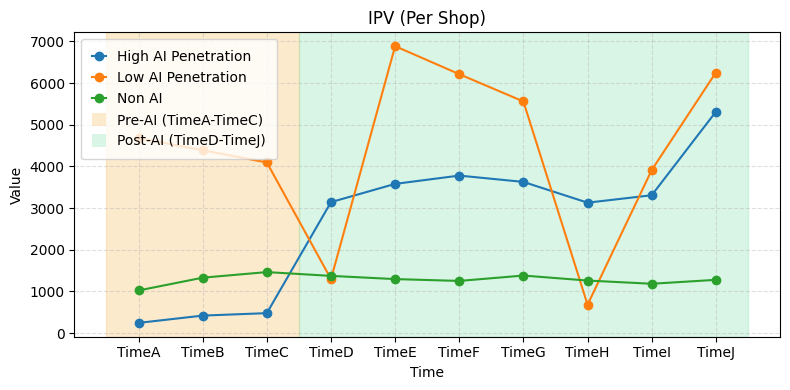

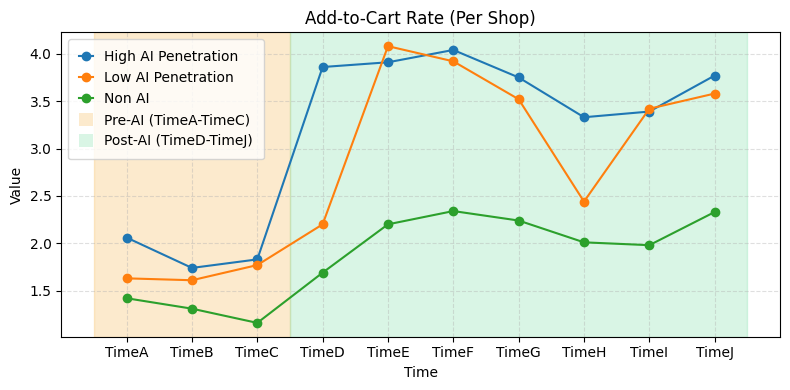

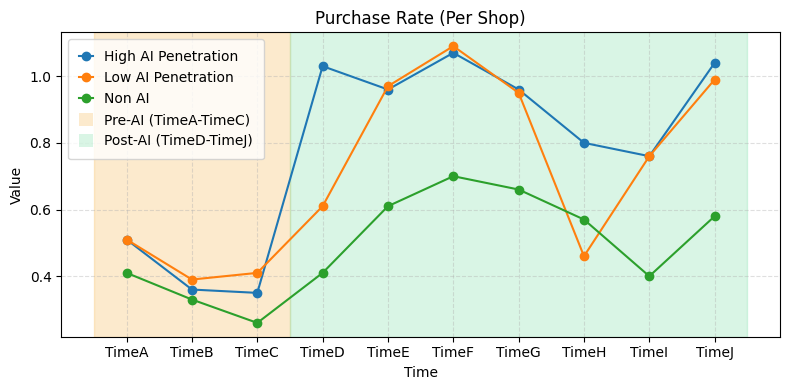

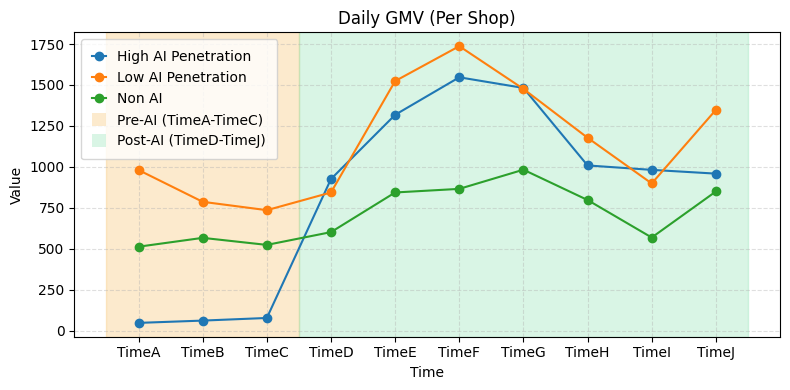

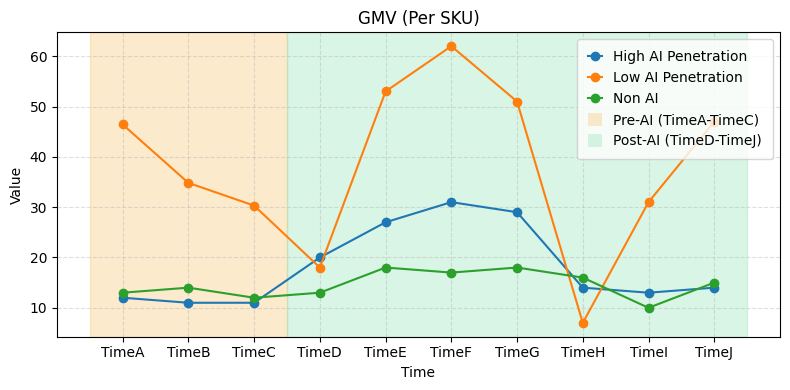

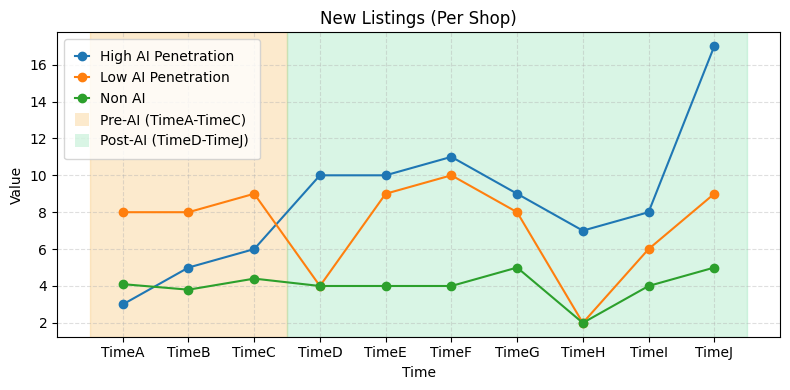

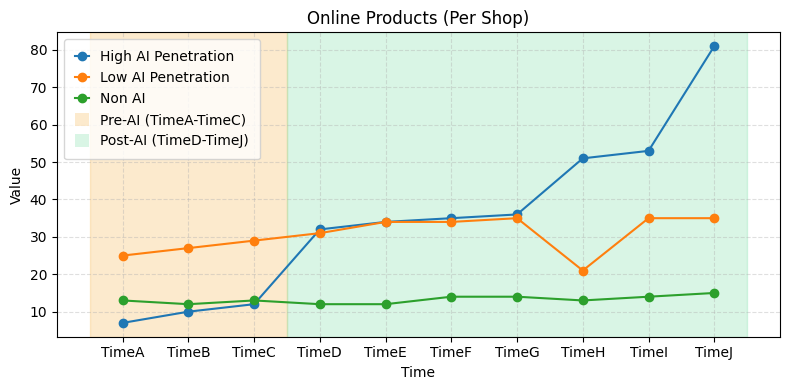

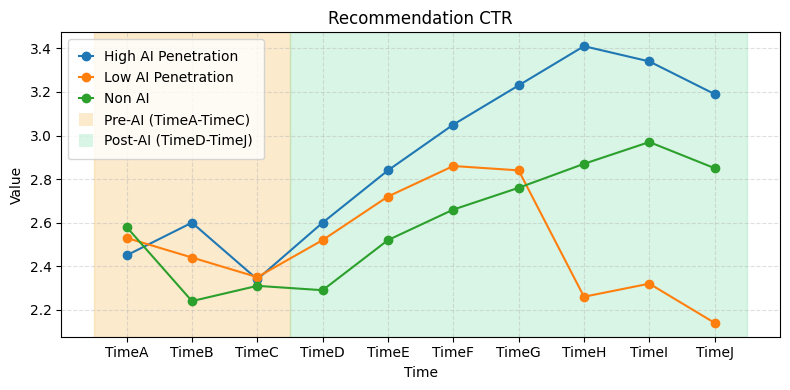

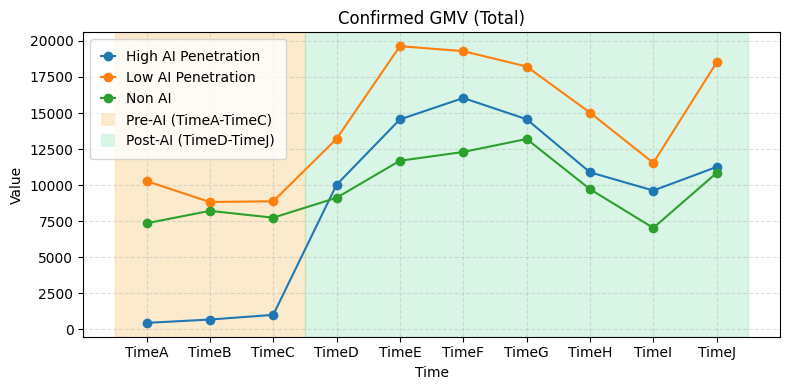

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# 时间轴
times = ["TimeA", "TimeB", "TimeC", "TimeD", "TimeE", "TimeF", "TimeG", "TimeH", "TimeI", "TimeJ"]
post_period = {"TimeD", "TimeE", "TimeF", "TimeG", "TimeH", "TimeI", "TimeJ"}

# 指标数据
metrics_data = {
    "IPV (Per Shop)": {
        "High AI Penetration": [245, 420, 479, 3143, 3581, 3780, 3628, 3130, 3308, 5312],
        "Low AI Penetration": [4681, 4387, 4095, 1296, 6886, 6214, 5559, 681, 3913, 6253],
        "Non AI": [1023, 1330, 1464, 1373, 1296, 1252, 1381, 1261, 1184, 1278],
    },
    "Add-to-Cart Rate (Per Shop)": {
        "High AI Penetration": [2.06, 1.74, 1.83, 3.86, 3.91, 4.04, 3.75, 3.33, 3.39, 3.77],
        "Low AI Penetration": [1.63, 1.61, 1.77, 2.20, 4.08, 3.92, 3.52, 2.44, 3.42, 3.58],
        "Non AI": [1.42, 1.31, 1.16, 1.69, 2.20, 2.34, 2.24, 2.01, 1.98, 2.33],
    },
    "Purchase Rate (Per Shop)": {
        "High AI Penetration": [0.51, 0.36, 0.35, 1.03, 0.96, 1.07, 0.96, 0.80, 0.76, 1.04],
        "Low AI Penetration": [0.51, 0.39, 0.41, 0.61, 0.97, 1.09, 0.95, 0.46, 0.76, 0.99],
        "Non AI": [0.41, 0.33, 0.26, 0.41, 0.61, 0.70, 0.66, 0.57, 0.40, 0.58],
    },
    "Daily GMV (Per Shop)": {
        "High AI Penetration": [48, 62, 78, 926, 1318, 1547, 1482, 1009, 982, 959],
        "Low AI Penetration": [981, 787, 736, 844, 1524, 1737, 1476, 1178, 899, 1348],
        "Non AI": [513, 567, 524, 602, 844, 866, 983, 798, 569, 850],
    },
    "GMV (Per SKU)": {
        "High AI Penetration": [12, 11, 11, 20, 27, 31, 29, 14, 13, 14],
        "Low AI Penetration": [46.44, 34.83, 30.31, 18, 53, 62, 51, 7, 31, 47],
        "Non AI": [13, 14, 12, 13, 18, 17, 18, 16, 10, 15],
    },
    "New Listings (Per Shop)": {
        "High AI Penetration": [3, 5, 6, 10, 10, 11, 9, 7, 8, 17],
        "Low AI Penetration": [8, 8, 9, 4, 9, 10, 8, 2, 6, 9],
        "Non AI": [4.1, 3.8, 4.4, 4, 4, 4, 5, 2, 4, 5],
    },
    "Online Products (Per Shop)": {
        "High AI Penetration": [7, 10, 12, 32, 34, 35, 36, 51, 53, 81],
        "Low AI Penetration": [25, 27, 29, 31, 34, 34, 35, 21, 35, 35],
        "Non AI": [13, 12, 13, 12, 12, 14, 14, 13, 14, 15],
    },
    "Recommendation CTR": {
        "High AI Penetration": [2.45, 2.60, 2.34, 2.60, 2.84, 3.05, 3.23, 3.41, 3.34, 3.19],
        "Low AI Penetration": [2.53, 2.44, 2.35, 2.52, 2.72, 2.86, 2.84, 2.26, 2.32, 2.14],
        "Non AI": [2.58, 2.24, 2.31, 2.29, 2.52, 2.66, 2.76, 2.87, 2.97, 2.85],
    },
    "Confirmed GMV (Total)": {
        "High AI Penetration": [439, 671, 996, 10022, 14556, 16041, 14571, 10889, 9621, 11257],
        "Low AI Penetration": [10278, 8827, 8874, 13208, 19638, 19293, 18226, 15028, 11540, 18513],
        "Non AI": [7349, 8212, 7738, 9119, 11689, 12297, 13200, 9716, 7029, 10847],
    },
}

# AI 使用前/后的范围
pre_span = (-0.5, 2.5)   # TimeA ~ TimeC
post_span = (2.5, 9.5)   # TimeD ~ TimeJ
pre_color = "#F8C471"   
post_color = "#82E0AA"  

for metric, group_values in metrics_data.items():
    df = pd.DataFrame({"Time": times})
    for group, values in group_values.items():
        df[group] = values

    fig, ax = plt.subplots(figsize=(8, 4))

    # 区间填色（AI 使用前/后）
    ax.axvspan(pre_span[0], pre_span[1], color=pre_color, alpha=0.35)
    ax.axvspan(post_span[0], post_span[1], color=post_color, alpha=0.30)

    # 折线
    for col in df.columns[1:]:
        ax.plot(df["Time"], df[col], marker="o", label=col)

    ax.set_title(metric)
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True, linestyle="--", alpha=0.4)

    # 自定义图例（可调 handlelength / handleheight）
    line_handles, line_labels = ax.get_legend_handles_labels()
    shading_handles = [
        Patch(facecolor=pre_color, alpha=0.35, label="Pre-AI (TimeA-TimeC)"),
        Patch(facecolor=post_color, alpha=0.30, label="Post-AI (TimeD-TimeJ)"),
    ]
    ax.legend(
        handles=line_handles + shading_handles,
        labels=line_labels + [patch.get_label() for patch in shading_handles],
        handlelength=1.0,
        handleheight=1.0,
        labelspacing=0.5,
        borderpad=0.8,
    )

    plt.tight_layout()
    plt.show()

In [12]:
import statsmodels.formula.api as smf
records = []
for metric, groups in metrics_data.items():
    for group, values in groups.items():
        for time, value in zip(times, values):
            records.append({"metric": metric, "group": group, "time": time, "value": value})

df = pd.DataFrame(records)
df["Post"] = df["time"].isin(post_period).astype(int)
df["is_high"] = (df["group"] == "High AI Penetration").astype(int)
df["is_low"] = (df["group"] == "Low AI Penetration").astype(int)
df["Post_high"] = df["Post"] * df["is_high"]
df["Post_low"] = df["Post"] * df["is_low"]

df["time"] = pd.Categorical(df["time"], categories=times, ordered=True)
df["group"] = pd.Categorical(
    df["group"],
    categories=["Non AI", "Low AI Penetration", "High AI Penetration"],
    ordered=False,
)

# -------------------------
# 回归并提取参数
# -------------------------
results = []
for metric in df["metric"].unique():
    sub = df[df["metric"] == metric].copy()
    model = smf.ols("value ~ Post_high + Post_low + C(time) + C(group)", data=sub)
    fit = model.fit(cov_type="HC1")  # HC1 异方差稳健标准误
    results.append(
        {
            "metric": metric,
            "tau_high": fit.params.get("Post_high", float("nan")),
            "se_high": fit.bse.get("Post_high", float("nan")),
            "p_high": fit.pvalues.get("Post_high", float("nan")),
            "tau_low": fit.params.get("Post_low", float("nan")),
            "se_low": fit.bse.get("Post_low", float("nan")),
            "p_low": fit.pvalues.get("Post_low", float("nan")),
            "n_obs": int(fit.nobs),
        }
    )

effects_df = pd.DataFrame(results)
effects_df = effects_df[
    ["metric", "tau_high", "se_high", "p_high", "tau_low", "se_low", "p_low", "n_obs"]
]

pd.set_option("display.float_format", "{:,.4f}".format)
print(effects_df)

                        metric   tau_high  se_high  p_high    tau_low  \
0               IPV (Per Shop) 3,299.1429 601.2550  0.0000    -4.3333   
1  Add-to-Cart Rate (Per Shop)     1.0286   0.1827  0.0000     0.8224   
2     Purchase Rate (Per Shop)     0.3110   0.0611  0.0000     0.1681   
3         Daily GMV (Per Shop)   859.2857  88.3603  0.0000   199.1429   
4                GMV (Per SKU)     7.5238   5.0382  0.1353    -1.0505   
5      New Listings (Per Shop)     5.7190   1.2587  0.0000    -1.3762   
6   Online Products (Per Shop)    35.5714   6.2911  0.0000     4.3810   
7           Recommendation CTR     0.3048   0.1575  0.0529    -0.2433   
8        Confirmed GMV (Total) 8,930.0476 663.7004  0.0000 4,375.5714   

    se_low  p_low  n_obs  
0 915.8568 0.9962     30  
1   0.2303 0.0004     30  
2   0.0718 0.0193     30  
3 106.7495 0.0621     30  
4   7.6857 0.8913     30  
5   1.0706 0.1986     30  
6   4.3881 0.3181     30  
7   0.1823 0.1821     30  
8 834.8811 0.0000     30  

In [15]:
model = smf.ols("value ~ Post_high + Post_low + C(time) + C(group)", data=sub)
fit = model.fit(cov_type="HC1")

# 提取参数
params = fit.params

# 取出时间固定效应 (b_t)
time_effects = params.filter(like="C(time)")

# 取出组别固定效应 (a_i)
group_effects = params.filter(like="C(group)")

# 打印结果
print("=== Fixed Effect Estimation ===")
print("-- Time Effect b_t --")
print(time_effects)
print("\n-- Merchant Fixed Effect a_i --")
print(group_effects)

bt_df = time_effects.reset_index()
bt_df.columns = ["term", "b_t"]

ai_df = group_effects.reset_index()
ai_df.columns = ["term", "a_i"]

=== Fixed Effect Estimation ===
-- Time Effect b_t --
C(time)[T.TimeB]     -118.6667
C(time)[T.TimeC]     -152.6667
C(time)[T.TimeD]      325.7937
C(time)[T.TimeE]    4,837.1270
C(time)[T.TimeF]    5,419.7937
C(time)[T.TimeG]    4,875.1270
C(time)[T.TimeH]    1,420.4603
C(time)[T.TimeI]   -1,060.5397
C(time)[T.TimeJ]    3,081.7937
dtype: float64

-- Merchant Fixed Effect a_i --
C(group)[T.Low AI Penetration]     1,560.0000
C(group)[T.High AI Penetration]   -7,064.3333
dtype: float64


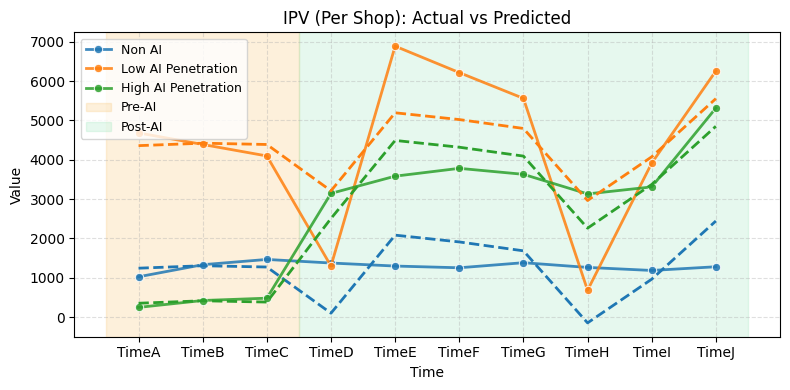

IPV (Per Shop)                      | R² = 0.793 | Mean Abs Error = 658.662


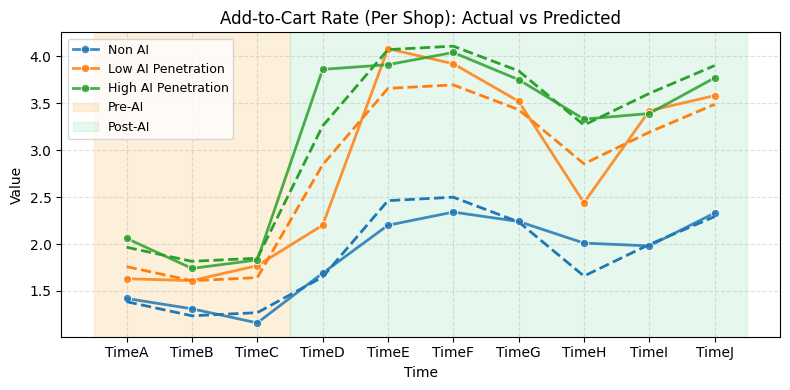

Add-to-Cart Rate (Per Shop)         | R² = 0.940 | Mean Abs Error = 0.166


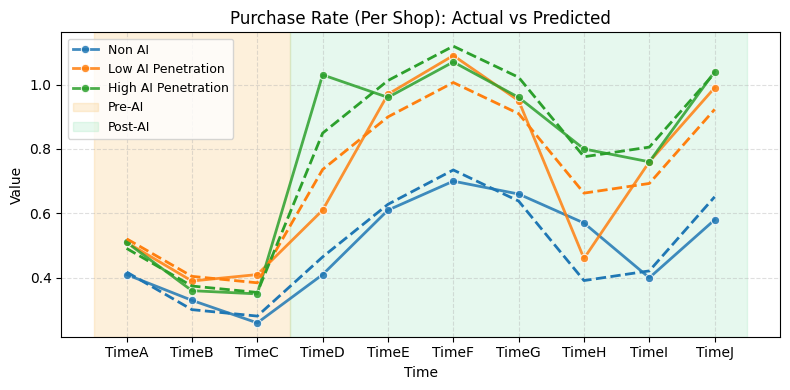

Purchase Rate (Per Shop)            | R² = 0.917 | Mean Abs Error = 0.054


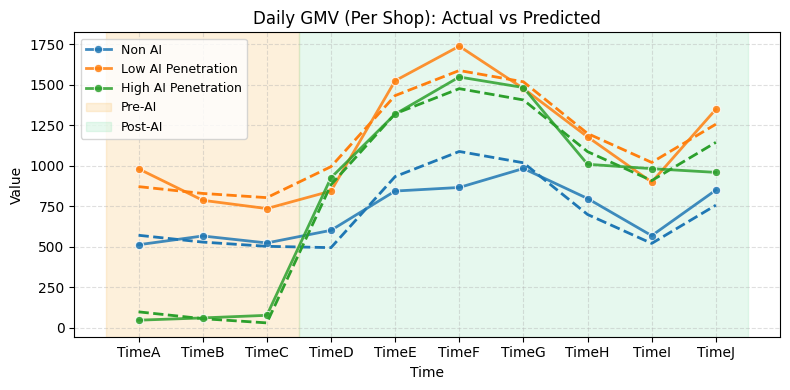

Daily GMV (Per Shop)                | R² = 0.953 | Mean Abs Error = 77.644


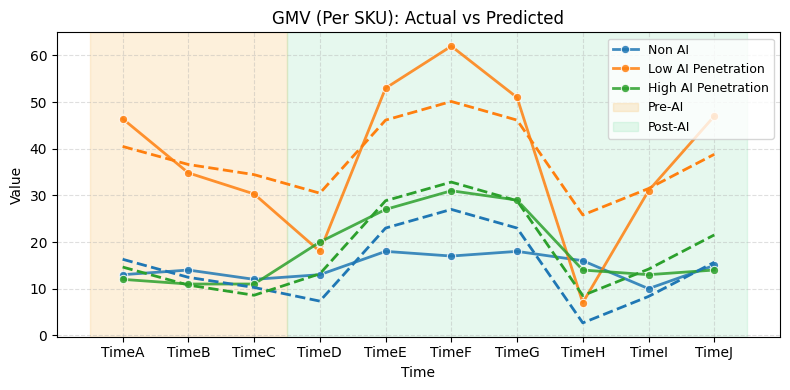

GMV (Per SKU)                       | R² = 0.786 | Mean Abs Error = 5.116


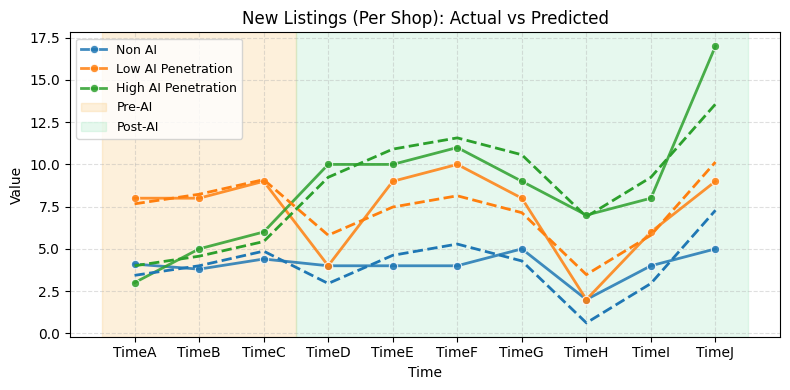

New Listings (Per Shop)             | R² = 0.854 | Mean Abs Error = 0.994


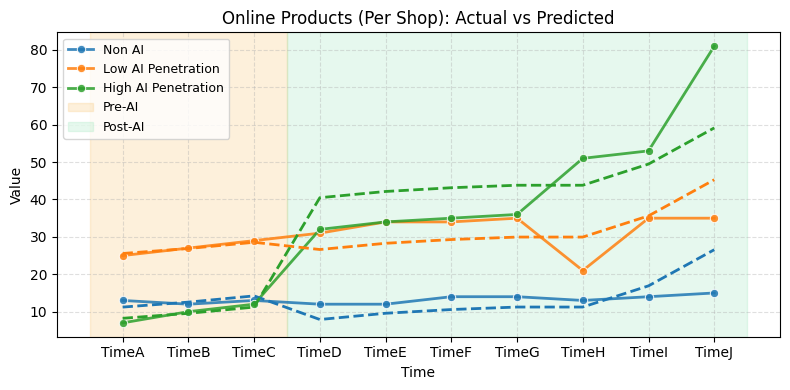

Online Products (Per Shop)          | R² = 0.829 | Mean Abs Error = 4.697


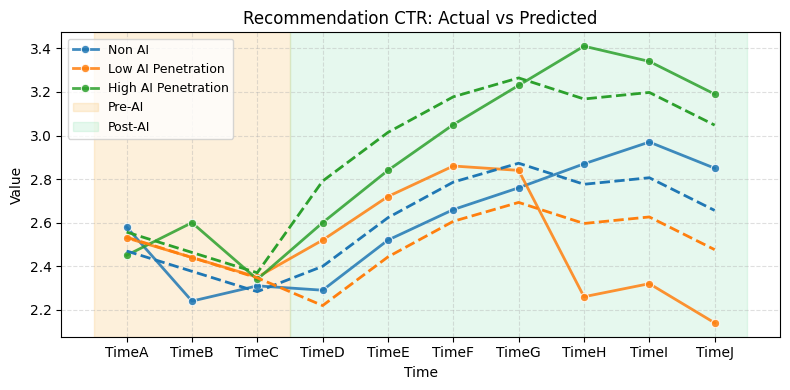

Recommendation CTR                  | R² = 0.724 | Mean Abs Error = 0.149


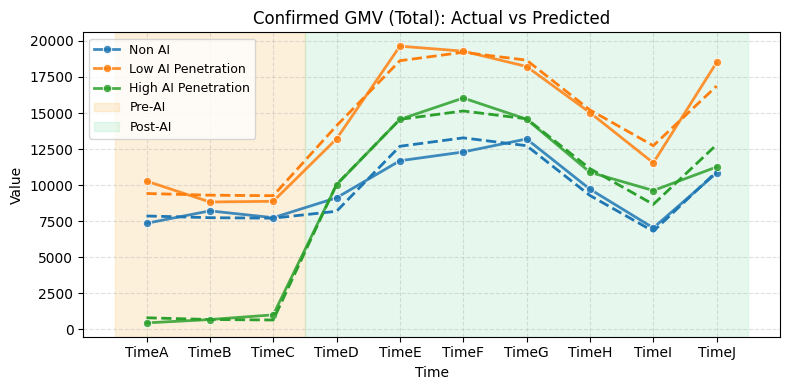

Confirmed GMV (Total)               | R² = 0.978 | Mean Abs Error = 559.151


In [13]:
import seaborn as sns
import numpy as np

# -----------------------------
# 可视化：真实值 vs 预测值
# -----------------------------
for metric in df["metric"].unique():
    sub = df[df["metric"] == metric].copy()

    # 回归拟合
    model = smf.ols("value ~ Post_high + Post_low + C(time) + C(group)", data=sub)
    fit = model.fit(cov_type="HC1")

    # 预测值（与真实值匹配）
    sub["predicted"] = fit.fittedvalues

    # 计算 group-level 平均误差
    sub["residual"] = sub["value"] - sub["predicted"]

    # 绘图
    plt.figure(figsize=(8, 4))

    # 折线：真实值 vs 预测值
    sns.lineplot(data=sub, x="time", y="value", hue="group",
                 linewidth=2, marker="o", alpha=0.85, legend=True)
    sns.lineplot(data=sub, x="time", y="predicted", hue="group",
                 linestyle="--", linewidth=2, legend=False)

    # 添加阴影色带（AI 使用前后）
    plt.axvspan(-0.5, 2.5, color="#F8C471", alpha=0.25, label="Pre-AI")
    plt.axvspan(2.5, 9.5, color="#82E0AA", alpha=0.20, label="Post-AI")

    plt.title(f"{metric}: Actual vs Predicted")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(title="", fontsize=9)

    plt.tight_layout()
    plt.show()

    # 打印指标：R², 残差均值
    r2 = fit.rsquared
    mae = np.mean(np.abs(sub["residual"]))
    print(f"{metric:35s} | R² = {r2:.3f} | Mean Abs Error = {mae:.3f}")